# EXTRACT FEATURES USING LIBROSA

In [24]:
!pip install librosa==0.9.2 # it works with numpy 2.0.0
!pip install --upgrade setuptools

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.3/214.3 KB 2.0 MB/s eta 0:00:00a 0:00:01


In [180]:
import librosa
import IPython.display as ipd
import os
import numpy as np

**Test**:

In [3]:
for file in os.listdir('data/002/'):
    print(file)

002097.mp3
002012.mp3
002096.mp3
002099.mp3


In [4]:
ipd.Audio('data/000/000002.mp3')

## EXTRACT FUNCTION

**Glosario**

1. Series temporales: sucesión de datos medidos en determinados momentos y ordenados cronológicamente.

Esta funcion carga el archivo de audio (mp3, wav, etc), obtiene la tasa de muestreo de este en base a su **serie temporal** Y 'kaiser_fast' es un método de remuestreo rápido adecuado para muchas aplicaciones de audio. Luego, procede a extraer los vectores caracteristicos del audio,

Finalmente, se halla la media a lo largo del tiempo en el que se reproduce el audio con los parametros hallados anteriormente (con 128 dimensiones tomando la media para este caso).

In [5]:
def features_extraction(file_path, dimensions):
    #load the audio file
    x, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
    #extract features from the audio file
    mfcc = np.mean(librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=dimensions),axis=1) # axis = 1
    
    return mfcc

Extraemos las caracterisitcas en un diccionario de listas

In [6]:
features = {}
directory = 'data/000/'
for audio in os.listdir(directory):
    audio_path = directory+audio
    features[audio_path] = features_extraction(audio_path,128)

### Extraer de todas las canciones

El limite establece cuantas canciones deseas tomar para obtener el vector caracteristico respectivo, con 128 dimensiones tomando la media.

In [10]:
features2 = {}
limit = 62  # Cambiar el limite por las canciones que desees trabajar
for folder_num in range(156):  # 0 to 155
    directory_folder = f'data/{folder_num:03}/'  # Format with 000, 001, 002, etc.
    for audio in os.listdir(directory_folder):
        if len(features2) >= limit:
            break  # Si llegamos al limite, salimos del loop
        directory_audio = directory_folder+audio
        print(directory_audio)
        features2[directory_audio] = features_extraction(directory_audio, 128)
    if len(features2) >= limit:
        break  # Si acabamos una carpeta, abrimos la siguiente

data/000/000821.mp3
data/000/000993.mp3
data/000/000200.mp3
data/000/000574.mp3
data/000/000853.mp3
data/000/000997.mp3
data/000/000694.mp3
data/000/000194.mp3
data/000/000141.mp3
data/000/000203.mp3
data/000/000255.mp3
data/000/000814.mp3
data/000/000546.mp3
data/000/000716.mp3
data/000/000892.mp3
data/000/000995.mp3
data/000/000667.mp3
data/000/000690.mp3
data/000/000002.mp3
data/000/000897.mp3
data/000/000005.mp3
data/000/000621.mp3
data/000/000193.mp3
data/000/000212.mp3
data/000/000666.mp3
data/000/000459.mp3
data/000/000256.mp3
data/000/000706.mp3
data/000/000704.mp3
data/000/000714.mp3
data/000/000625.mp3
data/000/000602.mp3
data/000/000148.mp3
data/000/000010.mp3
data/000/000707.mp3
data/000/000213.mp3
data/000/000540.mp3
data/000/000368.mp3
data/000/000718.mp3
data/000/000825.mp3
data/000/000140.mp3
data/000/000890.mp3
data/000/000204.mp3
data/000/000615.mp3
data/000/000211.mp3
data/000/000705.mp3
data/000/000998.mp3
data/000/000695.mp3
data/000/000709.mp3
data/000/000210.mp3


- 62 audios

In [7]:
features[audio_path], len(features[audio_path])

(array([-1.0913625e+02,  1.1145760e+02,  1.9239742e+01,  3.3354897e+01,
        -1.9550605e-01,  2.1893311e+01, -6.1913104e+00,  3.2205215e+01,
        -1.7681797e+01,  7.7508788e+00, -1.3839343e+01,  3.2560632e+00,
        -3.6748290e+00,  7.3345561e+00, -7.3874898e+00,  9.9428968e+00,
        -8.1497097e+00,  4.6133790e+00, -9.0162909e-01,  8.3428848e-01,
        -7.7813516e+00, -1.9776003e+00, -1.0380224e+01, -4.6002340e+00,
        -8.4588804e+00, -4.3461084e+00, -3.5764389e+00,  6.3684468e+00,
         2.4378364e+00,  1.0243895e+00, -3.0931718e+00, -6.7023194e-01,
         8.6680520e-01,  2.5937662e-01, -1.0762606e+00, -2.9169323e+00,
        -4.8772721e+00, -1.2878641e+00, -2.3433666e+00, -2.7494936e+00,
        -3.0889225e+00, -4.4222865e+00, -4.0611658e+00, -4.1105862e+00,
         3.7633756e-01, -1.7123842e+00, -2.9503357e+00, -5.1380877e+00,
        -6.7843127e+00, -2.5052085e+00,  1.9608724e+00,  1.0246009e+00,
        -3.7279446e+00, -5.4916801e+00, -3.9602377e+00, -2.10308

- 62 audios

In [11]:
features2[directory_audio], len(features2[directory_audio])

(array([-1.0913625e+02,  1.1145760e+02,  1.9239742e+01,  3.3354897e+01,
        -1.9550605e-01,  2.1893311e+01, -6.1913104e+00,  3.2205215e+01,
        -1.7681797e+01,  7.7508788e+00, -1.3839343e+01,  3.2560632e+00,
        -3.6748290e+00,  7.3345561e+00, -7.3874898e+00,  9.9428968e+00,
        -8.1497097e+00,  4.6133790e+00, -9.0162909e-01,  8.3428848e-01,
        -7.7813516e+00, -1.9776003e+00, -1.0380224e+01, -4.6002340e+00,
        -8.4588804e+00, -4.3461084e+00, -3.5764389e+00,  6.3684468e+00,
         2.4378364e+00,  1.0243895e+00, -3.0931718e+00, -6.7023194e-01,
         8.6680520e-01,  2.5937662e-01, -1.0762606e+00, -2.9169323e+00,
        -4.8772721e+00, -1.2878641e+00, -2.3433666e+00, -2.7494936e+00,
        -3.0889225e+00, -4.4222865e+00, -4.0611658e+00, -4.1105862e+00,
         3.7633756e-01, -1.7123842e+00, -2.9503357e+00, -5.1380877e+00,
        -6.7843127e+00, -2.5052085e+00,  1.9608724e+00,  1.0246009e+00,
        -3.7279446e+00, -5.4916801e+00, -3.9602377e+00, -2.10308

**Para 1000 audios (N=1000)**

1


**Para 2000 audios (N=2000)**

**Para 4000 audios (N=4000)**

**Para 8000 audios (N=8000)**

**Guardar caracteristicas en un txt(o csv) para poder trabajar con las funciones respectivas**

In [12]:
# Guardar las características en un archivo CSV
output_file = 'caracteristicas.txt'
with open(output_file, 'w') as f:
    for audio_path, feature_vector in features.items():
        feature_str = ','.join(map(str, feature_vector))
        f.write(feature_str + '\n')

print(f'Características guardadas en {output_file}')

Características guardadas en caracteristicas.txt


### CARACTERISTICAS DE 1K CANCIONES de spotify

In [6]:
import librosa
import numpy as np
import pandas as pd
import os
import glob

# Cargar los datos de las canciones
songs = pd.read_csv('BD2/spotify_songs_1000.csv')
# Procesar las 100 primeras canciones
songs = songs.head(100)

# EXtraccion de caracteristicas usando el coeficiente cepstral de frecuencias MEl (MFCC)
def features_extraction(file_path, mfcc_dimensions):
    #load the audio file
    x, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
    #extract features from the audio file
    # Tomamos axis = 1 para obtener el vector por frame
    mfcc1 = np.median(librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=mfcc_dimensions),axis=1)
    mfcc2 = np.mean(librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=mfcc_dimensions), axis=1)

    mfcc = np.concatenate((mfcc1, mfcc2))
    return mfcc


# Por si ya cargamos algunas canciones
if os.path.exists('songs/features.csv'):
    features_df = pd.read_csv('songs/features.csv')
else:
    columns = ['track_id'] + list(range(32)) # se toma 16 dimensiones de mediana y 16 de media de para cada canción
    features_df = pd.DataFrame(columns=columns)

features_append = []
dir_songs = "songs/get_songs"

for track_id in songs['track_id'].tolist():
    output_dir = os.path.join(dir_songs, track_id)
    audio_files = glob.glob(os.path.join(output_dir, '*.mp3'))
    if audio_files:
        file_path = audio_files[0]
        try:
            features = features_extraction(file_path,16) # 16 mfccs
            features_append.append([track_id] + features.tolist())
            print(f'Procesando {file_path}')
        except Exception as e:
            print(f'Error en {track_id}')
    else:
        print(f'No existe {track_id}.')

new_songs_features = pd.DataFrame(features_append, columns=features_df.columns) # new songs features

features_csv_final = pd.concat([features_df, new_songs_features]).drop_duplicates(subset=['track_id'], keep='last').to_csv('songs/features.csv', index=False)


Procesando songs/get_songs/1vrMGV0cxKxujjkhKiFMUe/Robin Thicke - Dreamworld.mp3
Procesando songs/get_songs/1vtQLXxSIr0A4Pfs9VGqxk/Juanes - Volverte A Ver - MTV Unplugged.mp3
Procesando songs/get_songs/1VUGWjzlqudhTqvhc17miB/Alan Walker, A$AP Rocky, Kameron - Live Fast - PUBGM.mp3
Procesando songs/get_songs/1wwR242udYdQC4ggSSB5oe/ZZ Top - Just Got Paid.mp3
Procesando songs/get_songs/1vV2FBKYvu6sJDqzSCNgbI/Gepe - Hablar de Ti.mp3
Procesando songs/get_songs/1vvfDEK6OeGQrYwQF9bVSO/New Edition - Cool It Now - Single Version.mp3
Procesando songs/get_songs/1vVm7saDXHk99SU5BFUDpp/ONE OK ROCK - Stand Out Fit In.mp3
Procesando songs/get_songs/1vvNmPOiUuyCbgWmtc6yfm/Calvin Harris - My Way.mp3
Procesando songs/get_songs/1VvsWao3Tx3QjkWgr6sTaO/Coolio - Fantastic Voyage.mp3
Procesando songs/get_songs/1vxu8vMNshg5J8z3oA7QJZ/TOOL - Parabola.mp3
Procesando songs/get_songs/1vxw6aYJls2oq3gW0DujAo/Gnarls Barkley - Crazy.mp3
Procesando songs/get_songs/1VynpqrTbP74RZVIFeKFcJ/Selena Gomez - Hands To Myself -

/tmp/ipykernel_174404/1549005813.py:51: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  features_csv_final = pd.concat([features_df, new_songs_features]).drop_duplicates(subset=['track_id'], keep='last').to_csv('songs/features.csv', index=False)


# KNN SECUENCIAL POR RANGO => Priority Queue implementation

In [181]:
import os
import numpy as np
import pandas as pd

### Usando como dataframe

In [182]:
datatrain = pd.read_csv('caracteristicas.txt', delimiter=',',header=None)
datatrain

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-279.493770,107.43127,27.155413,38.658894,13.291126,12.284817,7.912653,11.730992,1.852015,14.259245,...,-0.214073,-0.126173,-0.280696,0.133412,0.087925,-0.032882,0.064871,-0.226785,-0.182280,0.174803
1,-46.736973,68.70684,-5.373628,79.818060,-1.944685,19.275017,-18.135607,23.467173,-7.741561,15.192821,...,-0.298629,-0.131426,0.135979,0.373947,-0.304054,-0.241802,-0.137508,0.007591,-0.289327,-0.153891
2,-125.478920,107.36263,-35.030895,45.024017,-14.402672,5.545005,-16.173170,0.666865,-14.277558,-3.404136,...,-2.733471,-1.143900,0.813777,0.214391,1.200410,-0.408023,0.729546,-0.413111,1.106927,-0.657402
3,26.302788,96.20209,-27.547405,31.373700,-5.173703,8.728168,-22.667824,13.142274,-16.770706,13.229664,...,-1.596435,-0.685801,0.008083,0.242196,-0.028450,-1.561300,-0.352832,-0.756937,-0.198574,-0.546801
4,-137.152770,160.33844,-48.495712,25.974400,-27.531189,3.875678,-21.977947,-11.495177,-11.879602,-19.831512,...,4.003118,2.023160,-0.800477,-0.616799,-0.356341,-0.545697,0.134309,0.118896,-1.347533,-1.780952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,-371.622700,101.75163,1.112667,10.696216,-7.979471,-8.353549,-10.060410,-5.127144,-8.032457,-2.940178,...,-2.488961,1.082442,1.362806,0.418846,0.402526,-0.306786,-0.150198,-0.615719,0.891733,0.701828
58,-63.417230,92.56318,15.321829,53.707935,-2.641846,11.115909,-8.841730,21.890974,-7.945403,6.978655,...,-1.454748,-0.824816,1.024672,-0.207049,0.325804,-0.441885,0.667421,-1.077246,0.706793,-0.002181
59,-190.439640,154.81139,11.507574,24.079240,1.627001,12.702878,11.971477,10.539657,0.595186,11.419574,...,-0.272269,-0.693613,0.029258,0.708910,0.172116,-0.213862,0.287643,-0.079025,-0.210915,-0.207996
60,-167.306440,111.43845,-10.706645,31.735271,-2.549926,7.274684,-14.051503,6.058118,-17.874039,-2.261830,...,-2.650482,-1.223714,1.899443,-0.947209,-0.242893,0.732363,-0.700358,0.308122,0.673577,0.477903


In [183]:
datatrain.values

array([[-2.7949377e+02,  1.0743127e+02,  2.7155413e+01, ...,
        -2.2678454e-01, -1.8227996e-01,  1.7480274e-01],
       [-4.6736973e+01,  6.8706840e+01, -5.3736280e+00, ...,
         7.5911945e-03, -2.8932660e-01, -1.5389082e-01],
       [-1.2547892e+02,  1.0736263e+02, -3.5030895e+01, ...,
        -4.1311067e-01,  1.1069268e+00, -6.5740170e-01],
       ...,
       [-1.9043964e+02,  1.5481139e+02,  1.1507574e+01, ...,
        -7.9025030e-02, -2.1091500e-01, -2.0799573e-01],
       [-1.6730644e+02,  1.1143845e+02, -1.0706645e+01, ...,
         3.0812160e-01,  6.7357700e-01,  4.7790316e-01],
       [-1.0913625e+02,  1.1145760e+02,  1.9239742e+01, ...,
         3.5320503e-01, -3.6042672e-01,  1.1493343e-01]])

## 100 primeras canciones de spotify

In [184]:
spotify_first_100_songs = pd.read_csv('songs/features.csv')
spotify_first_100_songs

,track_id,0,1,2,3,4,5,6,7,8,...,22,23,24,25,26,27,28,29,30,31
0,1vrMGV0cxKxujjkhKiFMUe,-168.878159,149.072647,21.776253,26.428905,7.036612,13.988304,-7.050924,9.281805,-4.899842,...,-7.729264,9.396115,-5.355382,5.343457,-4.884625,0.623324,-6.162462,5.175552,-3.474116,3.481900
1,1vtQLXxSIr0A4Pfs9VGqxk,-141.927872,104.623260,-13.809748,23.729591,-5.454809,3.934413,-17.897779,2.765239,-19.374825,...,-18.366474,3.598580,-20.127872,-1.448218,-15.359255,-2.784066,-12.672614,2.034963,-7.431748,-2.691384
2,1VUGWjzlqudhTqvhc17miB,-65.685509,107.928513,-6.070539,24.247662,-4.453581,17.097683,-5.910975,14.199185,-4.005401,...,-6.700347,13.305501,-4.634307,7.919794,-8.088497,13.877119,-7.292703,8.440472,-5.662231,9.277442
3,1wwR242udYdQC4ggSSB5oe,-96.210899,123.919128,-13.377733,35.899574,-2.989725,15.094671,-13.977314,9.277575,-7.679050,...,-12.962585,9.191157,-7.276983,8.908538,-3.253258,9.431903,-9.649590,-2.531559,-13.214782,8.227883
4,1vV2FBKYvu6sJDqzSCNgbI,-103.631905,116.454971,-0.162480,34.817287,6.409921,14.213140,-5.376309,8.498374,-13.602956,...,-4.987783,7.709389,-13.807278,8.141221,-11.188488,8.035986,-6.782213,5.709587,-6.415751,5.376391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,22wxe2Yc9JzihICXYLGAQ7,-103.925575,78.330170,-25.393541,32.182938,-14.050151,22.233772,-13.256703,14.449039,-9.008409,...,-13.356791,13.832288,-9.016235,12.568184,-9.200377,4.278409,-12.301690,7.865534,-7.987207,3.191339
96,1x8IGM8FYl6uqn806QWdW0,13.737985,63.583981,-30.029293,36.279991,7.862535,15.371902,-4.948892,18.736816,-5.732473,...,-5.531920,18.295965,-6.127413,15.032658,-4.713542,14.242610,-10.259677,8.945946,-9.388658,11.557683
97,1X8mgsS7R6lcKLjDPeQWum,-86.898232,106.617416,-8.303510,21.915831,1.938028,8.727294,-0.851275,2.928460,-5.767075,...,-0.291131,3.755218,-5.617647,4.612319,-10.097785,9.184505,-7.445401,6.298498,-9.826911,2.804892
98,1xaBABHhVCk94lGVC92Yll,-74.833511,102.100845,-20.217266,29.809080,2.096610,3.887137,-10.884363,9.154326,-6.352649,...,-10.534563,8.671904,-7.069006,13.309566,-9.109767,4.834162,-8.322210,7.333630,-3.210646,1.639468


In [185]:
spotify_first_100_songs_datatrain = spotify_first_100_songs.iloc[:,1:]
spotify_first_100_songs_datatrain.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-168.878159,149.072647,21.776253,26.428905,7.036612,13.988304,-7.050924,9.281805,-4.899842,5.740732,...,-7.729264,9.396115,-5.355382,5.343457,-4.884625,0.623324,-6.162462,5.175552,-3.474116,3.481900
1,-141.927872,104.623260,-13.809748,23.729591,-5.454809,3.934413,-17.897779,2.765239,-19.374825,-1.103747,...,-18.366474,3.598580,-20.127872,-1.448218,-15.359255,-2.784066,-12.672614,2.034963,-7.431748,-2.691384
2,-65.685509,107.928513,-6.070539,24.247662,-4.453581,17.097683,-5.910975,14.199185,-4.005401,8.870492,...,-6.700347,13.305501,-4.634307,7.919794,-8.088497,13.877119,-7.292703,8.440472,-5.662231,9.277442
3,-96.210899,123.919128,-13.377733,35.899574,-2.989725,15.094671,-13.977314,9.277575,-7.679050,9.845185,...,-12.962585,9.191157,-7.276983,8.908538,-3.253258,9.431903,-9.649590,-2.531559,-13.214782,8.227883
4,-103.631905,116.454971,-0.162480,34.817287,6.409921,14.213140,-5.376309,8.498374,-13.602956,8.875006,...,-4.987783,7.709389,-13.807278,8.141221,-11.188488,8.035986,-6.782213,5.709587,-6.415751,5.376391


In [186]:
spotify_first_100_songs_datatrain.values

array([[-168.87815857,  149.07264709,   21.77625275, ...,    5.17555189,
          -3.47411585,    3.48189998],
       [-141.9278717 ,  104.6232605 ,  -13.8097477 , ...,    2.03496265,
          -7.43174839,   -2.69138408],
       [ -65.68550873,  107.92851257,   -6.07053947, ...,    8.44047165,
          -5.66223145,    9.27744198],
       ...,
       [ -86.89823151,  106.61741638,   -8.30350971, ...,    6.29849768,
          -9.82691097,    2.80489159],
       [ -74.83351135,  102.10084534,  -20.21726608, ...,    7.33363008,
          -3.21064591,    1.63946843],
       [ -83.34364319,   93.27145386,   12.88890076, ...,   10.88921165,
         -10.19482231,    7.53377056]])

## KNN PRIORITY QUEUE IMPLEMENTACION

In [187]:
# Usaremos un lambda porque la función euclidean_distances toma un array y no un valor escalar
ED = lambda P, Q: np.sqrt((P-Q)**2)

def knnSearch(collection, query, k, query_index):
    heap = [] # heap vacio

    for i in range(len(collection)):
        #if i == query_index:
        #    continue  # Skip the query point
        dist = np.sqrt((ED(collection[i], query) ** 2).sum()) # porque es una serie de pandas y no un array de numpy
        # Use negative distance because heapq is a min heap
        if len(heap) < k: # k
            heapq.heappush(heap, (-dist, i)) # si no se ha llenado el heap, se inserta
        else:
            heapq.heappushpop(heap, (-dist, i)) # si ya se lleno el heap, se inserta y se elimina el menor

    # Return indices and distances, reversing the order so that the closest is first
    indices_and_distances = [(i, -d) for d, i in sorted(heap, reverse=True)]
    return indices_and_distances

## TESTING AUDIOS FMA

In [188]:
import heapq
import time

datatrain = pd.read_csv('caracteristicas.txt', delimiter=',',header=None)

# calcular la busqueda por rango de los k vecinos más cercanos
for ind_q in [5, 8, 12]: 
    for k in [2, 4, 8]:    
        query = datatrain.iloc[ind_q]
        dataT = datatrain
        result = knnSearch(dataT.values, query, k,ind_q)
        # Promedio de tiempo
        total_time = 0
        for _ in range(10):
            start_time = time.time()
            result = knnSearch(dataT.values, query, k, ind_q)
            end_time = time.time()
            total_time += end_time - start_time
        average_time = total_time / 10

        print(f'Resultado para k={k}: {result}')
        print(f'Tiempo promedio: {average_time} segundos')
        #pr = 0
        #for (id, d) in result:
        #    if dataset.iloc[id, 4] == dataset.iloc[ind_q, 4]:
        #        pr += 1
        #print("Query"+str(ind_q), ": k " +str(k), ": precision ", pr / len(result))  
    print("="*20)

Resultado para k=2: [(5, 0.0), (15, 51.13560035492607)]
Tiempo promedio: 0.011811208724975587 segundos
Resultado para k=4: [(5, 0.0), (15, 51.13560035492607), (46, 51.13932264345304), (39, 68.62170001679245)]
Tiempo promedio: 0.012386536598205567 segundos
Resultado para k=8: [(5, 0.0), (15, 51.13560035492607), (46, 51.13932264345304), (39, 68.62170001679245), (19, 71.22541917305466), (3, 78.38130144344906), (26, 81.40978975158771), (17, 109.469142453388)]
Tiempo promedio: 0.012905097007751465 segundos
Resultado para k=2: [(8, 0.0), (59, 55.26439163555318)]
Tiempo promedio: 0.011806154251098632 segundos
Resultado para k=4: [(8, 0.0), (59, 55.26439163555318), (36, 58.84971285214339), (12, 63.62238901428006)]
Tiempo promedio: 0.012131214141845703 segundos
Resultado para k=8: [(8, 0.0), (59, 55.26439163555318), (36, 58.84971285214339), (12, 63.62238901428006), (7, 65.16865439222416), (22, 67.90407993294633), (55, 69.58293582100696), (60, 70.63006890178438)]
Tiempo promedio: 0.0109326362609

## TESTING SPOTIFY SONGS

In [189]:
spotify_first_100_songs

,track_id,0,1,2,3,4,5,6,7,8,...,22,23,24,25,26,27,28,29,30,31
0,1vrMGV0cxKxujjkhKiFMUe,-168.878159,149.072647,21.776253,26.428905,7.036612,13.988304,-7.050924,9.281805,-4.899842,...,-7.729264,9.396115,-5.355382,5.343457,-4.884625,0.623324,-6.162462,5.175552,-3.474116,3.481900
1,1vtQLXxSIr0A4Pfs9VGqxk,-141.927872,104.623260,-13.809748,23.729591,-5.454809,3.934413,-17.897779,2.765239,-19.374825,...,-18.366474,3.598580,-20.127872,-1.448218,-15.359255,-2.784066,-12.672614,2.034963,-7.431748,-2.691384
2,1VUGWjzlqudhTqvhc17miB,-65.685509,107.928513,-6.070539,24.247662,-4.453581,17.097683,-5.910975,14.199185,-4.005401,...,-6.700347,13.305501,-4.634307,7.919794,-8.088497,13.877119,-7.292703,8.440472,-5.662231,9.277442
3,1wwR242udYdQC4ggSSB5oe,-96.210899,123.919128,-13.377733,35.899574,-2.989725,15.094671,-13.977314,9.277575,-7.679050,...,-12.962585,9.191157,-7.276983,8.908538,-3.253258,9.431903,-9.649590,-2.531559,-13.214782,8.227883
4,1vV2FBKYvu6sJDqzSCNgbI,-103.631905,116.454971,-0.162480,34.817287,6.409921,14.213140,-5.376309,8.498374,-13.602956,...,-4.987783,7.709389,-13.807278,8.141221,-11.188488,8.035986,-6.782213,5.709587,-6.415751,5.376391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,22wxe2Yc9JzihICXYLGAQ7,-103.925575,78.330170,-25.393541,32.182938,-14.050151,22.233772,-13.256703,14.449039,-9.008409,...,-13.356791,13.832288,-9.016235,12.568184,-9.200377,4.278409,-12.301690,7.865534,-7.987207,3.191339
96,1x8IGM8FYl6uqn806QWdW0,13.737985,63.583981,-30.029293,36.279991,7.862535,15.371902,-4.948892,18.736816,-5.732473,...,-5.531920,18.295965,-6.127413,15.032658,-4.713542,14.242610,-10.259677,8.945946,-9.388658,11.557683
97,1X8mgsS7R6lcKLjDPeQWum,-86.898232,106.617416,-8.303510,21.915831,1.938028,8.727294,-0.851275,2.928460,-5.767075,...,-0.291131,3.755218,-5.617647,4.612319,-10.097785,9.184505,-7.445401,6.298498,-9.826911,2.804892
98,1xaBABHhVCk94lGVC92Yll,-74.833511,102.100845,-20.217266,29.809080,2.096610,3.887137,-10.884363,9.154326,-6.352649,...,-10.534563,8.671904,-7.069006,13.309566,-9.109767,4.834162,-8.322210,7.333630,-3.210646,1.639468


In [191]:
import heapq
import time

spotify_songs = pd.read_csv('BD2/spotify_songs_1000.csv')
spotify_first_100_songs = pd.read_csv('songs/features.csv')
spotify_first_100_songs_datatrain = spotify_first_100_songs.iloc[:,1:]

# calcular la busqueda por rango de los k vecinos más cercanos
for ind_q in [5, 8, 12]: 
    print(f'Query ID cancion: {spotify_first_100_songs.iloc[ind_q, 0]}')
    print(f'Nombre de la canción-artista: {spotify_songs.iloc[ind_q, 1]}-{spotify_songs.iloc[ind_q, 2]}')
    print()
    for k in [2,4,8]:     # 2 4 8
        query = spotify_first_100_songs_datatrain.iloc[ind_q]
        dataT = spotify_first_100_songs_datatrain
        result = knnSearch(dataT.values, query, k,ind_q)
        
        # Promedio de tiempo
        total_time = 0
        for _ in range(10):
            start_time = time.time()
            result = knnSearch(dataT.values, query, k, ind_q)
            end_time = time.time()
            total_time += end_time - start_time
        average_time = total_time / 10

        print(f'Resultado para k={k}: {result}')
        print(f'Tiempo promedio: {average_time} segundos')
        
        #pr = 0
        for (id, d) in result:
            #print(f'ID top k:{k}: {spotify_first_100_songs.iloc[id, 0]}')
            print(f'Nombre de la canción-artista {id}: {spotify_songs.iloc[id, 1]}-{spotify_songs.iloc[id, 2]}')
        print("  *"*20)
    print("="*20)

Query ID cancion: 1vvfDEK6OeGQrYwQF9bVSO
Nombre de la canción-artista: Cool It Now - Single Version-New Edition

Resultado para k=2: [(5, 0.0), (95, 40.61994319487386)]
Tiempo promedio: 0.016836929321289062 segundos
Nombre de la canción-artista 5: Cool It Now - Single Version-New Edition
Nombre de la canción-artista 95: Big Shot-Billy Joel
  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *
Resultado para k=4: [(5, 0.0), (95, 40.61994319487386), (8, 44.05212210767627), (30, 52.26261065371607)]
Tiempo promedio: 0.01710367202758789 segundos
Nombre de la canción-artista 5: Cool It Now - Single Version-New Edition
Nombre de la canción-artista 95: Big Shot-Billy Joel
Nombre de la canción-artista 8: Fantastic Voyage-Coolio
Nombre de la canción-artista 30: En Busca de Ti - Remix-Zazo & Gxurmet
  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *
Resultado para k=8: [(5, 0.0), (95, 40.61994319487386), (8, 44.05212210767627), (30, 52.26261065371607), (39, 54.007311031804754), (

# KNN SECUENCIAL POR RANGO => Range Search implementation

Generando radios

- audios fma

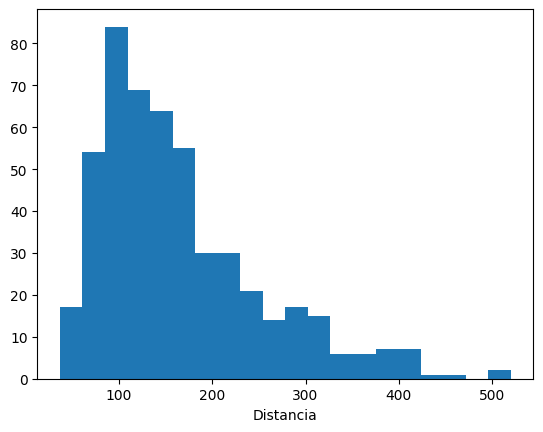

Radio <= 60.771061021110675: 3.4%
Radio <= 84.95053729014496: 14.2%
Radio <= 109.13001355917925: 31.0%
Radio <= 133.30948982821354: 44.8%
Radio <= 157.48896609724784: 57.6%
Radio <= 181.6684423662821: 68.6%
Radio <= 205.8479186353164: 74.6%
Radio <= 230.0273949043507: 80.6%
Radio <= 254.206871173385: 84.8%
Radio <= 278.38634744241926: 87.6%
Radio <= 302.5658237114536: 91.0%
Radio <= 326.74529998048786: 94.0%
Radio <= 350.9247762495221: 95.2%
Radio <= 375.10425251855645: 96.4%
Radio <= 399.2837287875907: 97.8%
Radio <= 423.46320505662504: 99.2%
Radio <= 447.6426813256593: 99.4%
Radio <= 471.82215759469364: 99.6%
Radio <= 496.0016338637279: 99.6%
Radio <= 520.1811101327622: 100.0%


In [192]:
import pandas as pd
import random
import numpy as np
import time

# vector caracteristico ( cada indice es una cancion )
datatrain = pd.read_csv('caracteristicas.txt', delimiter=',',header=None)

ED = lambda P, Q: np.sqrt(sum((P-Q)**2))

def genDistancias(data, N):
    v = np.zeros(N)
    for i in range(N):
        ind = np.random.choice(data.shape[0], size=2, replace=False)
        P = data[ind[0], :]
        Q = data[ind[1], :]
        #v[i] = distance.euclidean(P, Q)
        v[i] = np.sqrt((ED(P, Q) ** 2).sum())
    return v

D = genDistancias(datatrain.values, 500)

# Generate the histogram
import matplotlib.pyplot as plt
plt.hist(D, bins=20)
plt.xlabel('Distancia')
plt.show()

# R script reference to python
hist, bin_edges = np.histogram(D, bins=20)
cumulative_counts = np.cumsum(hist)
coverage_percentage = 100 * cumulative_counts / cumulative_counts[-1]

for i in range(len(bin_edges) - 1):
    print(f"Radio <= {bin_edges[i+1]}: {round(coverage_percentage[i], 2)}%")

In [193]:
# Calcular percentiles para elegir r1, r2, y r3
percentiles = np.percentile(D, [10, 20, 30]) # tmb puede ser [25, 50, 75]
r1, r2, r3 = percentiles[0], percentiles[1], percentiles[2]
print(f"r1 = {r1}")
print(f"r2 = {r2}")
print(f"r3 = {r3}")

r1 = 77.45118786577908
r2 = 93.00626029090397
r3 = 108.11750489563403


## KNN range search implementacion

In [194]:
def rangeSearch(collection, query, r, query_index):
    result = []
    heap = []
    for i in range(len(collection)):
        #if i == query_index: # Skip the query point
        #    continue
        #dist = ED(collection[i], query)
        dist = np.sqrt((ED(collection[i], query) ** 2).sum())
        if (dist < r).all():  # Check if all elements in the Series are less than r
            result.append(i)
            #sort by distance to r
            heapq.heappush(heap, (dist, i))
    sorted_result = [index for _, index in heapq.nsmallest(len(heap), heap)]
    return sorted_result # result

### Testing radius

In [195]:
import time

# calcular la busqueda por rango
radios_obtenidos = [r1, r2, r3]

for ind_q in [5, 8, 12]: 
    for radio in radios_obtenidos:
        query = datatrain.iloc[ind_q]
        #dataT = datatrain.drop([ind_q], axis=0, inplace=False) # borra la fila de la query respectiva
        dataT = datatrain
        # PRomedio
        total_time = 0
        for _ in range(10):
            start_time = time.time()
            result = rangeSearch(dataT.values, query, radio, ind_q)
            end_time = time.time()
            total_time += end_time - start_time
        average_time = total_time / 10

        print(f'Resultado para radio={radio}: {result}')
        print(f'Tiempo promedio: {average_time} segundos')
        #pr = 0
        #for (id) in result:
        #    if dataset.iloc[id, 4] == dataset.iloc[ind_q, 4]:
        #        pr += 1
        #    print("Query"+str(ind_q), ": radio " +str(radio), ": precision ", pr / len(result))
    print("="*20)

Resultado para radio=77.45118786577908: [5, 15, 46, 39, 19]
Tiempo promedio: 0.005949330329895019 segundos
Resultado para radio=93.00626029090397: [5, 15, 46, 39, 19, 3, 26]
Tiempo promedio: 0.005769872665405273 segundos
Resultado para radio=108.11750489563403: [5, 15, 46, 39, 19, 3, 26]
Tiempo promedio: 0.005896806716918945 segundos
Resultado para radio=77.45118786577908: [8, 59, 36, 12, 7, 22, 55, 60, 42]
Tiempo promedio: 0.005774950981140137 segundos
Resultado para radio=93.00626029090397: [8, 59, 36, 12, 7, 22, 55, 60, 42, 50, 11, 37, 0, 40]
Tiempo promedio: 0.005972766876220703 segundos
Resultado para radio=108.11750489563403: [8, 59, 36, 12, 7, 22, 55, 60, 42, 50, 11, 37, 0, 40, 9, 51, 52, 53, 10, 35, 23, 30, 44, 29]
Tiempo promedio: 0.005924320220947266 segundos
Resultado para radio=77.45118786577908: [12, 36, 50, 8, 11, 59, 22]
Tiempo promedio: 0.005657672882080078 segundos
Resultado para radio=93.00626029090397: [12, 36, 50, 8, 11, 59, 22, 7, 42, 9]
Tiempo promedio: 0.00566425

- para spotify

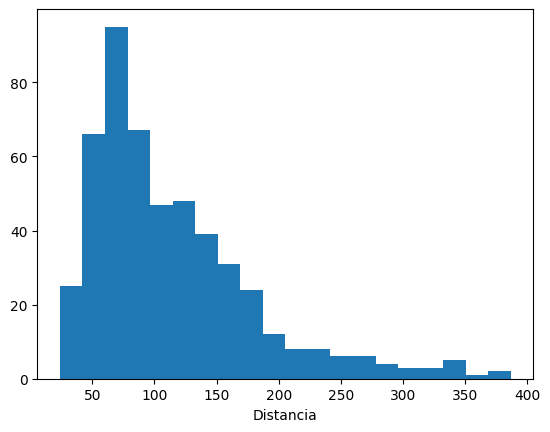

Radio <= 42.071148544480906: 5.0%
Radio <= 60.207596878198345: 18.2%
Radio <= 78.3440452119158: 37.2%
Radio <= 96.48049354563324: 50.6%
Radio <= 114.61694187935069: 60.0%
Radio <= 132.75339021306814: 69.6%
Radio <= 150.88983854678557: 77.4%
Radio <= 169.02628688050302: 83.6%
Radio <= 187.16273521422048: 88.4%
Radio <= 205.29918354793793: 90.8%
Radio <= 223.43563188165535: 92.4%
Radio <= 241.5720802153728: 94.0%
Radio <= 259.70852854909026: 95.2%
Radio <= 277.8449768828077: 96.4%
Radio <= 295.98142521652517: 97.2%
Radio <= 314.1178735502426: 97.8%
Radio <= 332.2543218839601: 98.4%
Radio <= 350.3907702176775: 99.4%
Radio <= 368.527218551395: 99.6%
Radio <= 386.66366688511243: 100.0%


In [196]:
import pandas as pd
import random
import numpy as np
import time

# vector caracteristico ( cada indice es una cancion )
spotify_songs = pd.read_csv('BD2/spotify_songs_1000.csv')
spotify_first_100_songs = pd.read_csv('songs/features.csv')
spotify_first_100_songs_datatrain = spotify_first_100_songs.iloc[:,1:]

ED = lambda P, Q: np.sqrt(sum((P-Q)**2))

def genDistancias(data, N):
    v = np.zeros(N)
    for i in range(N):
        ind = np.random.choice(data.shape[0], size=2, replace=False)
        P = data[ind[0], :]
        Q = data[ind[1], :]
        #v[i] = distance.euclidean(P, Q)
        v[i] = np.sqrt((ED(P, Q) ** 2).sum())
    return v

D = genDistancias(spotify_first_100_songs_datatrain.values, 500)

# Generate the histogram
import matplotlib.pyplot as plt
plt.hist(D, bins=20)
plt.xlabel('Distancia')
plt.show()

# R script reference to python
hist, bin_edges = np.histogram(D, bins=20)
cumulative_counts = np.cumsum(hist)
coverage_percentage = 100 * cumulative_counts / cumulative_counts[-1]

for i in range(len(bin_edges) - 1):
    print(f"Radio <= {bin_edges[i+1]}: {round(coverage_percentage[i], 2)}%")

In [197]:
# Calcular percentiles para elegir r1, r2, y r3
percentiles = np.percentile(D, [10, 30, 50]) # tmb puede ser [2            print(spotify_first_100_songs.iloc[id, 0])5,50,75]
r1, r2, r3 = percentiles[0], percentiles[1], percentiles[2]
print(f"r1 = {r1}")
print(f"r2 = {r2}")
print(f"r3 = {r3}")

r1 = 50.57936326666865
r2 = 70.47459320501025
r3 = 95.34626535044293


## Testing radius

In [198]:
import time

# vector caracteristico ( cada indice es una cancion )
spotify_songs = pd.read_csv('BD2/spotify_songs_1000.csv')
spotify_first_100_songs = pd.read_csv('songs/features.csv')
spotify_first_100_songs_datatrain = spotify_first_100_songs.iloc[:,1:]

# calcular la busqueda por rango
radios_obtenidos = [r1, r2, r3]

for ind_q in [5, 8, 12]: 
    print(f'ID cancion query: {spotify_first_100_songs.iloc[ind_q, 0]}')
    print(f'query cancion-artista: {spotify_songs.iloc[ind_q, 1]}-{spotify_songs.iloc[ind_q, 2]}')
    print()
    for radio in radios_obtenidos:
        query = spotify_first_100_songs_datatrain.iloc[ind_q]
        #dataT = datatrain.drop([ind_q], axis=0, inplace=False) # borra la fila de la query respectiva
        dataT = spotify_first_100_songs_datatrain
        # PRomedio
        total_time = 0
        for _ in range(10):
            start_time = time.time()
            result = rangeSearch(dataT.values, query, radio, ind_q)
            end_time = time.time()
            total_time += end_time - start_time
        average_time = total_time / 10

        result = rangeSearch(dataT.values, query, radio, ind_q)

        print(f'Resultado para radio={radio}: {result}')
        print(f'Tiempo promedio: {average_time} segundos')
    print("="*20)

ID cancion query: 1vvfDEK6OeGQrYwQF9bVSO
query cancion-artista: Cool It Now - Single Version-New Edition

Resultado para radio=50.57936326666865: [5, 95, 8]
Tiempo promedio: 0.008697724342346192 segundos
Resultado para radio=70.47459320501025: [5, 95, 8, 30, 39, 51, 21, 40, 64, 93, 94, 22, 1]
Tiempo promedio: 0.008640313148498535 segundos
Resultado para radio=95.34626535044293: [5, 95, 8, 30, 39, 51, 21, 40, 64, 93, 94, 22, 1, 49, 26, 79, 47, 82, 38, 76, 16, 4, 52, 36, 90, 97, 19, 84, 74, 43, 3, 67, 59, 81, 99, 10, 55, 98, 54, 33]
Tiempo promedio: 0.00894775390625 segundos
ID cancion query: 1VvsWao3Tx3QjkWgr6sTaO
query cancion-artista: Fantastic Voyage-Coolio

Resultado para radio=50.57936326666865: [8, 21, 5]
Tiempo promedio: 0.008876419067382813 segundos
Resultado para radio=70.47459320501025: [8, 21, 5, 67, 39, 30, 26, 94, 16, 79, 51]
Tiempo promedio: 0.00896904468536377 segundos
Resultado para radio=95.34626535044293: [8, 21, 5, 67, 39, 30, 26, 94, 16, 79, 51, 74, 38, 90, 4, 49, 95

## KNN RTREE

In [45]:
#!pip install rtree==1.1.0

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 KB 3.7 MB/s eta 0:00:00a 0:00:01


In [199]:
import matplotlib.pyplot as plt
import numpy as np
import os
import rtree
import time

### Probando RTree

#### ANALIZANDO RTREE

HALLAR UNO SOLO
La consulta tomó en promedio 0.0001311779022216797 segundos
Las k:8 canciones más cercanas a la consulta son (contar la query): [5, 15, 46, 39, 19, 3, 26, 17]


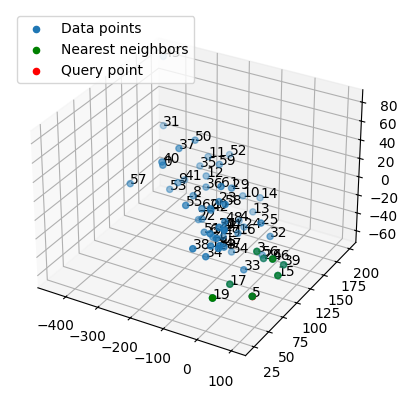

In [222]:
from mpl_toolkits.mplot3d import Axes3D
from rtree import index
import matplotlib.pyplot as plt # cm

D = len(datatrain.columns)    # dimension del vector caracteristico
#print(D)
querys = [5]
k_values = [5,10]

# Create a new RTree index
prop = rtree.index.Property()
prop.dimension = D    # dimension del vector caracteristico
prop.buffering_capacity = 8    # Cantidad maxima de MBRs en un nodo 
ind = rtree.index.Index(properties = prop)

#Generar los datos    
data = datatrain.values

# insertar los puntos                
for i in range(data.shape[0]):
    ind.insert(i, data[i])    
    
print('HALLAR UNO SOLO')

query = data[5]
k = 8

def knn_rtree(collection, query, k):
    # Create a new RTree index
    prop = rtree.index.Property()
    prop.dimension = 128    # dimension del vector caracteristico
    #prop.buffering_capacity = 8    # Cantidad maxima de MBRs en un nodo 
    ind = rtree.index.Index(properties = prop)

    # insertar los puntos                
    for i in range(collection.shape[0]):
        ind.insert(i, collection[i].tolist() + collection[i].tolist())     

    # Promedio
    avg = 0
    # aplicar la consulta indexada (correr 10 veces y tomar el promedio)
    for i in range(10):
        start_time = time.time()
        ind.nearest(query, num_results=k) # cambiar a k+1 porque se cuenta a si mismo
        avg += time.time() - start_time

    avg = avg/10
    # Obtener los k vecinos más cercanos (k+1 para excluir el punto de consulta si está presente)
    k_nearest = list(ind.nearest(query.tolist() + query.tolist(), num_results=k))
    ind.close()

    # Calcular distancias y ordenar
    distances = []
    for idx in k_nearest:
        dist = np.linalg.norm(collection[idx] - query)
        distances.append((dist, idx))
            
    distances.sort(key=lambda x: x[0])  # Ordenar por distancia
    
    # Extraer índices ordenados
    sorted_indices = [idx for _, idx in distances]

    print(f'La consulta tomó en promedio {avg} segundos')
    #print(f'Los k={k} más cercanos a la consulta son:{neighbors_without_query}')
    print(f'Las k:{k} canciones más cercanas a la consulta son (contar la query): {sorted_indices}')
    #print(f'Las k:{k} canciones más cercanas a la consulta son (sin contar la query): {nearest_songs}')

    # Create a new figure
    fig = plt.figure()

    # Create a 3D subplot
    ax = fig.add_subplot(111, projection='3d')

    # Plot all points
    ax.scatter(collection[:, 0], collection[:, 1], collection[:, 2], label='Data points')

    # Plot the nearest neighbors
    ax.scatter(neighbors[:, 0], neighbors[:, 1], neighbors[:, 2], c='green', label='Nearest neighbors')

    # Plot the query point
    ax.scatter(query[0], query[1], query[2], c='red', label='Query point')

    # Add indices as text annotations
    for i in range(collection.shape[0]):
        ax.text(collection[i, 0], collection[i, 1], collection[i, 2], str(i))  # to take from index 0 as in sequential knn

    ax.legend(loc='upper left')
    plt.show()

knn_rtree(data, query, k)

- para spotify

HALLAR UNO SOLO
query id: 1vvfDEK6OeGQrYwQF9bVSO
query cancion-artista: Cool It Now - Single Version-New Edition
Las k=8 canciones más cercanas a la consulta son (contar la query): [5, 95, 8, 30, 39, 51, 21, 40]
La consulta tomó en promedio 6.558895111083985e-05 segundos
Nombre de la canción-artista 5: Just Got Paid-ZZ Top
Nombre de la canción-artista 95: Cool It Now - Single Version-New Edition
Nombre de la canción-artista 8: I Need Your Help-Deitrick Haddon
Nombre de la canción-artista 30: Spin Around-The Eiffels
Nombre de la canción-artista 39: Fuego-DJ Snake
Nombre de la canción-artista 51: Is This Love - Remix-Bob Marley & The Wailers
Nombre de la canción-artista 21: Little Lion Man - Live-Mumford & Sons
Nombre de la canción-artista 40: Location-Khalid


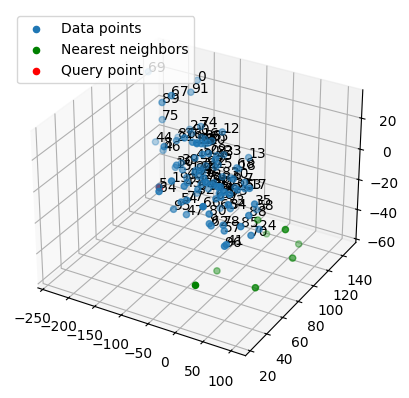

In [221]:
from mpl_toolkits.mplot3d import Axes3D
from rtree import index
import matplotlib.pyplot as plt # cm
import pandas as pd
import numpy as np
import time

spotify_songs = pd.read_csv('BD2/spotify_songs_1000.csv')
spotify_first_100_songs = pd.read_csv('songs/features.csv')
spotify_first_100_songs_datatrain = spotify_first_100_songs.iloc[:,1:]

#Generar los datos    
data = spotify_first_100_songs_datatrain.values  
    
print('HALLAR UNO SOLO')

query = data[5]
query_index = 5
k = 8
dimension = data.shape[1]

def knn_rtree(collection, query, k,query_index,dimension):
    # Create a new RTree index
    prop = rtree.index.Property()
    prop.dimension = dimension    # dimension del vector caracteristico
    #prop.buffering_capacity = 8    # Cantidad maxima de MBRs en un nodo 
    ind = rtree.index.Index(properties = prop)

    # insertar los puntos                
    for i in range(collection.shape[0]):
        ind.insert(i, collection[i].tolist() + collection[i].tolist())  

    print(f'query id: {spotify_first_100_songs.iloc[query_index, 0]}')
    print(f'query cancion-artista: {spotify_songs.iloc[query_index, 1]}-{spotify_songs.iloc[query_index, 2]}')

    # Promedio
    avg = 0
    # aplicar la consulta indexada (correr 10 veces y tomar el promedio)
    for i in range(10):
        start_time = time.time()
        ind.nearest(query, num_results=k) # cambiar a k+1 porque se cuenta a si mismo
        avg += time.time() - start_time

    avg = avg/10
    # Obtener los k vecinos más cercanos (k+1 para excluir el punto de consulta si está presente)
    k_nearest = list(ind.nearest(query.tolist() + query.tolist(), num_results=k))
    ind.close()

    # Calcular distancias y ordenar
    distances = []
    for idx in k_nearest:
        dist = np.linalg.norm(collection[idx] - query)
        distances.append((dist, idx))
            
    distances.sort(key=lambda x: x[0])  # Ordenar por distancia
    
    # Extraer índices ordenados
    sorted_indices = [idx for _, idx in distances]

    # Visualización y resultados
    print(f'Las k={k} canciones más cercanas a la consulta son (contar la query): {sorted_indices}')

    print(f'La consulta tomó en promedio {avg} segundos')
    #print(f'Las k:{k} canciones más cercanas a la consulta son (sin contar la query): {nearest_songs}')

    for i in range(len(nearest_songs_with_query)):
        print(f'Nombre de la canción-artista {sorted_indices[i]}: {spotify_songs.iloc[nearest_songs_with_query[i], 1]}-{spotify_songs.iloc[nearest_songs_with_query[i], 2]}')

    # Create a new figure
    fig = plt.figure()

    # Create a 3D subplot
    ax = fig.add_subplot(111, projection='3d')

    # Plot all points
    ax.scatter(collection[:, 0], collection[:, 1], collection[:, 2], label='Data points')

    # Plot the nearest neighbors
    ax.scatter(neighbors[:, 0], neighbors[:, 1], neighbors[:, 2], c='green', label='Nearest neighbors')

    # Plot the query point
    ax.scatter(query[0], query[1], query[2], c='red', label='Query point')

    # Add indices as text annotations
    for i in range(collection.shape[0]):
        ax.text(collection[i, 0], collection[i, 1], collection[i, 2], str(i))  # to take from index 0 as in sequential knn

    ax.legend(loc='upper left')
    plt.show()

knn_rtree(data, query, k,query_index, dimension)

## KNN HIGH D

## Implementacion con Faiss

In [174]:
import faiss
import time
import numpy as np

def knn_faiss(data, query, k, num_trials=10):
    total_time = 0  # Acumulador para el tiempo total
    for _ in range(num_trials):
        start_time = time.time()  # Inicio del temporizador
        d = len(data[0])  # Dimensionality of the feature vectors
        index = faiss.IndexFlatL2(d)  # L2 distance
        index.add(np.array(data, dtype='float32'))  # Add data to the index
        D, I = index.search(np.array([query], dtype='float32'), k)  # Perform the search k+1 para no contar la query
        end_time = time.time()  # Fin del temporizador
        total_time += end_time - start_time  # Acumular el tiempo de ejecución
    average_time = total_time / num_trials  # Calcular el promedio
    return I[0], D[0], average_time

Tiempo de ejecución promedio de knn_faiss: 0.00011818408966064453 segundos
Los k=8 más cercanos a la consulta son:[ 5 15 46 39 19  3 26 17]
Las distancias a los k=8 vecinos más cercanos son:[    0.      2614.85    2615.2305  4708.9375  5073.06    6143.6284
  6627.5537 11983.494 ]


- audios fma

In [175]:
#Generar los datos    
data = datatrain.values
query = data[5]

faiss_knn_results, faiss_knn_distances, average_time = knn_faiss(data, query, k=8)

print(f"Tiempo de ejecución promedio de knn_faiss: {average_time} segundos")
print(f'Los k={k} más cercanos a la consulta son:{faiss_knn_results}') # faiss_knn_results[1:]
print(f'Las distancias a los k={k} vecinos más cercanos son:{faiss_knn_distances}') # faiss_knn_results[1:]

Tiempo de ejecución promedio de knn_faiss: 5.1069259643554685e-05 segundos
Los k=8 más cercanos a la consulta son:[ 5 15 46 39 19  3 26 17]
Las distancias a los k=8 vecinos más cercanos son:[    0.      2614.85    2615.2305  4708.9375  5073.06    6143.6284
  6627.5537 11983.494 ]


- spotify

In [179]:
spotify_songs = pd.read_csv('BD2/spotify_songs_1000.csv')
spotify_first_100_songs = pd.read_csv('songs/features.csv')
spotify_first_100_songs_datatrain = spotify_first_100_songs.iloc[:,1:]

#Generar los datos    
data = spotify_first_100_songs_datatrain.values
query = data[5]

faiss_knn_results, faiss_knn_distances, average_time = knn_faiss(data, query, k=8)

print(f'Query ID cancion: {spotify_first_100_songs.iloc[5, 0]}')
print(f'Nombre de la canción-artista: {spotify_songs.iloc[5, 1]}-{spotify_songs.iloc[5, 2]}')
print(' *'*20)

print(f"Tiempo de ejecución promedio de knn_faiss: {average_time} segundos")
print(f'Los k={k} más cercanos a la consulta son:{faiss_knn_results}') # faiss_knn_results[1:]
print(f'Las distancias a los k={k} vecinos más cercanos son:{faiss_knn_distances}') # faiss_knn_results[1:]

for i in range(len(faiss_knn_results)):
    print(f'Nombre de la canción-artista {faiss_knn_results[i]}: {spotify_songs.iloc[faiss_knn_results[i], 1]}-{spotify_songs.iloc[faiss_knn_results[i], 2]}')

Query ID cancion: 1vvfDEK6OeGQrYwQF9bVSO
Nombre de la canción-artista: Cool It Now - Single Version-New Edition
 * * * * * * * * * * * * * * * * * * * *
Tiempo de ejecución promedio de knn_faiss: 1.5974044799804688e-05 segundos
Los k=8 más cercanos a la consulta son:[ 5 95  8 30 39 51 21 40]
Las distancias a los k=8 vecinos más cercanos son:[   0.     1649.9797 1940.5895 2731.3806 2916.7896 2968.436  3004.7498
 3110.372 ]
Nombre de la canción-artista 5: Cool It Now - Single Version-New Edition
Nombre de la canción-artista 95: Big Shot-Billy Joel
Nombre de la canción-artista 8: Fantastic Voyage-Coolio
Nombre de la canción-artista 30: En Busca de Ti - Remix-Zazo & Gxurmet
Nombre de la canción-artista 39: Little Lion Man - Live-Mumford & Sons
Nombre de la canción-artista 51: I Like Me Better-Lauv
Nombre de la canción-artista 21: Hip Hop Hooray-Naughty By Nature
Nombre de la canción-artista 40: Outside Looking In-Jordan Pruitt
